
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

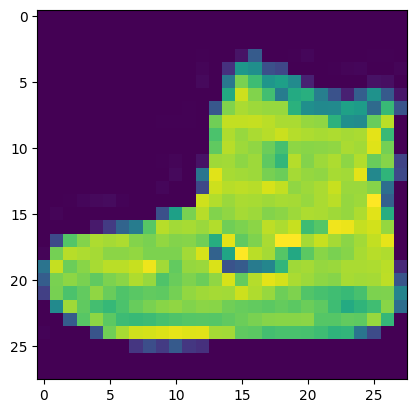

In [4]:
image = x_train[0]
plt.imshow(image)

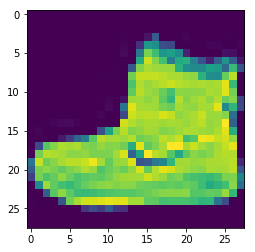

## Предобработка

**Нормализуйте данные X_train и X_test **

255

In [5]:
image.max()

255

In [6]:
x_train = x_train/255
x_test = x_test/255

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_test = x_test.reshape(10000, 28, 28, 1)

**Преобразуйте  y_train и y_test в one_hot представления **

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train)

In [13]:
y_cat_test = to_categorical(y_test)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [17]:
model.fit(x_train, y_cat_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4160 - accuracy: 0.8526
Epoch 2/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2827 - accuracy: 0.8975
Epoch 3/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2417 - accuracy: 0.9123
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2130 - accuracy: 0.9218
Epoch 5/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1913 - accuracy: 0.9305
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1728 - accuracy: 0.9378
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1578 - accuracy: 0.9430
Epoch 8/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1446 - accuracy: 0.9478
Epoch 9/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1321 - accuracy: 0.9531
Epoch 10/15
1875/1875 [==============================] - 33s 18m

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

['loss', 'acc']

In [18]:
model.metrics_names

['loss', 'accuracy']

In [19]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.3960 - accuracy: 0.9025


[0.3960425853729248, 0.9024999737739563]

In [20]:
from sklearn.metrics import classification_report

In [21]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [22]:
predicted = predictions.argmax(axis=1)

In [23]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.93      0.92      1000
           4       0.82      0.84      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.65      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

In [24]:
weights = model.layers[0].get_weights()
weights[0].shape

(4, 4, 1, 32)

In [28]:
import torch

In [29]:
weights_tensor = torch.FloatTensor(weights[0])

In [30]:
ww = weights_tensor.reshape(32, 4, 4)

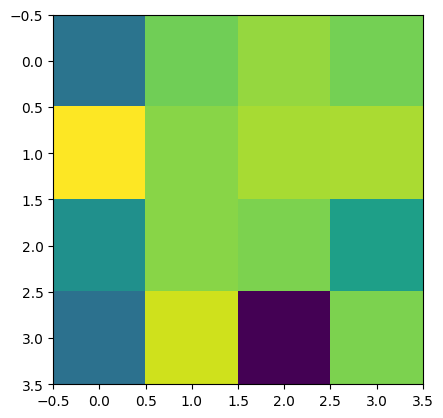

In [31]:
plt.imshow(ww[0])

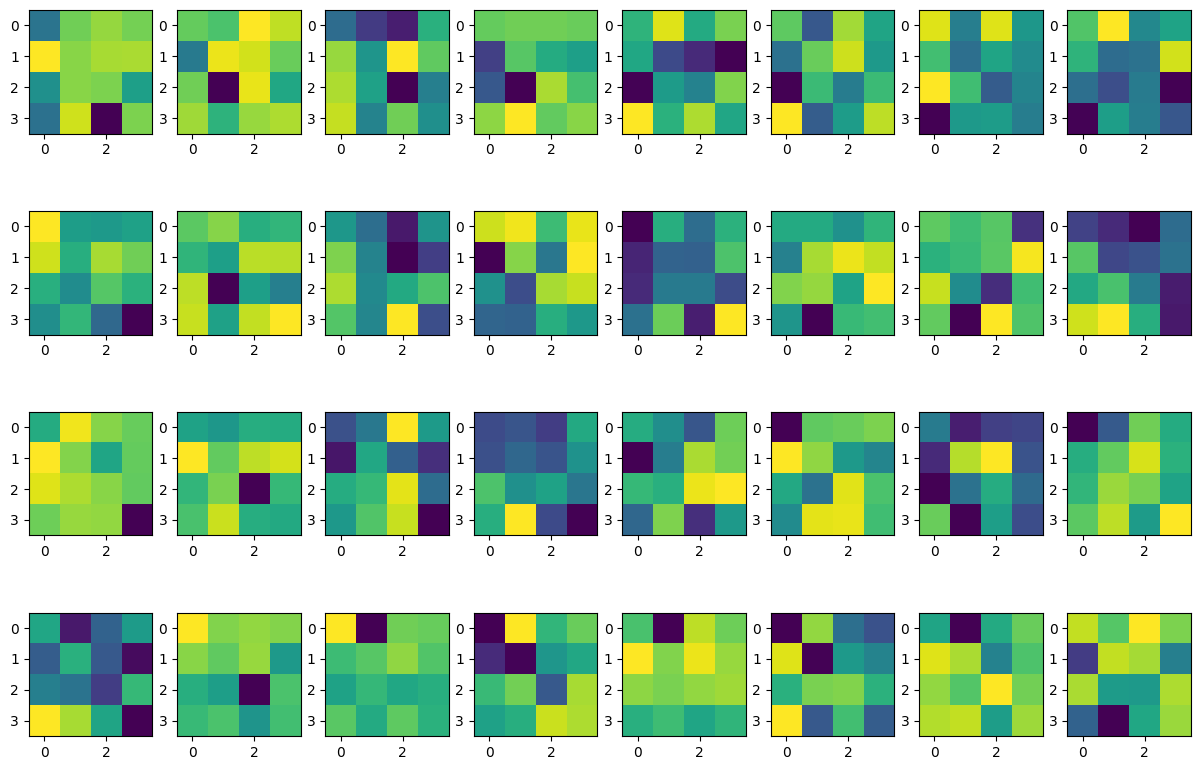

In [32]:
figure, axis = plt.subplots(4, 8)

figure.set_figheight(10)
figure.set_figwidth(15)

count = 0

for i in range(0, 4):
    for j in range(0, 8):
        axis[i, j].imshow(ww[count])
        count += 1       